# <font color='green'> <center> Diabetes Dataset </font>

### <font color='41D05C'> <center> Part 1: Gather Resources </font>

#### <font color='#F1DB1F'> <center> Import general libraries </font>

In [1]:
# General Libraries
import numpy as np
import math
import pandas as pd 

#Data visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#statistics
from scipy.stats import norm

import warnings



plt.style.use('dark_background')
sns.set_style('dark')
plt.rcParams['figure.figsize'] = [18, 12]
color='g'

#warnings get annoying 
warnings.filterwarnings('ignore')



#### <font color='#F1DB1F'> <center>Import ML libraries </font>

In [2]:
# Machine Learning Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron

from sklearn.naive_bayes import BernoulliNB, GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import  DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import feature_selection
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn import metrics
from sklearn.pipeline import Pipeline


#### <font color='#F1DB1F'><center> Import Data </font>

In [4]:
filename = 'diabetes.csv'
df = pd.read_csv(filename)

# Verify data loaded correctly
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color='41D05C'><center> Part 2: Exploratory Data Analysis </font>

#### <font color='#F1DB1F'> <center>Identify data types, null values </font>

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <font color='#F1DB1F'> <center> Examine data dispersion </font>

In [371]:
df.describe(include='all')

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [372]:
#Checkpoint
df2 = df.copy()

#### <font color='#F1DB1F'> <center> Univariate Analysis </font>

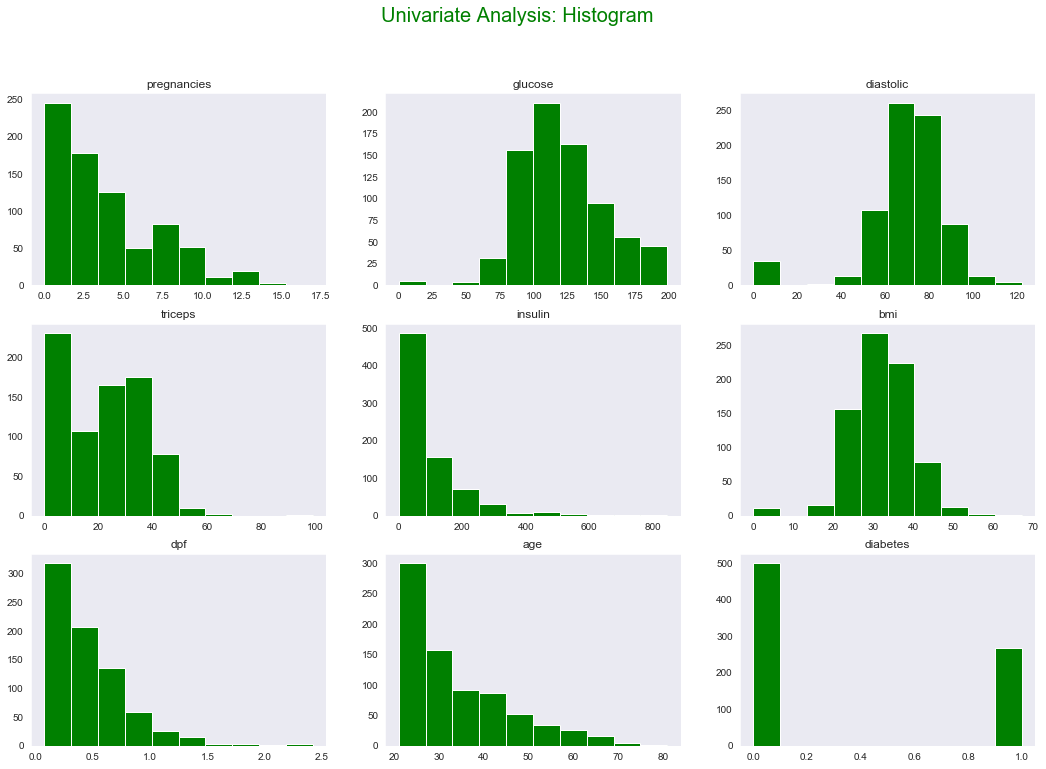

In [373]:
#Histogram
i = 0
for col in df2:
    plt.subplot(331 +i)
    if ((df2[col].dtype == 'int64') | (df2[col].dtype == 'float64') ):
        plt.hist(df2[col],color=color)
        plt.title(col)
        plt.xlabel('')
    else:
        temp = df2.groupby(col)[[col]].count()
        plt.bar(temp.index,temp[col], color= color)
        plt.title(col)
        plt.xlabel('bar')
    i += 1
title = plt.suptitle('Univariate Analysis: Histogram')
plt.setp(title, color=color, size=20)
plt.show()

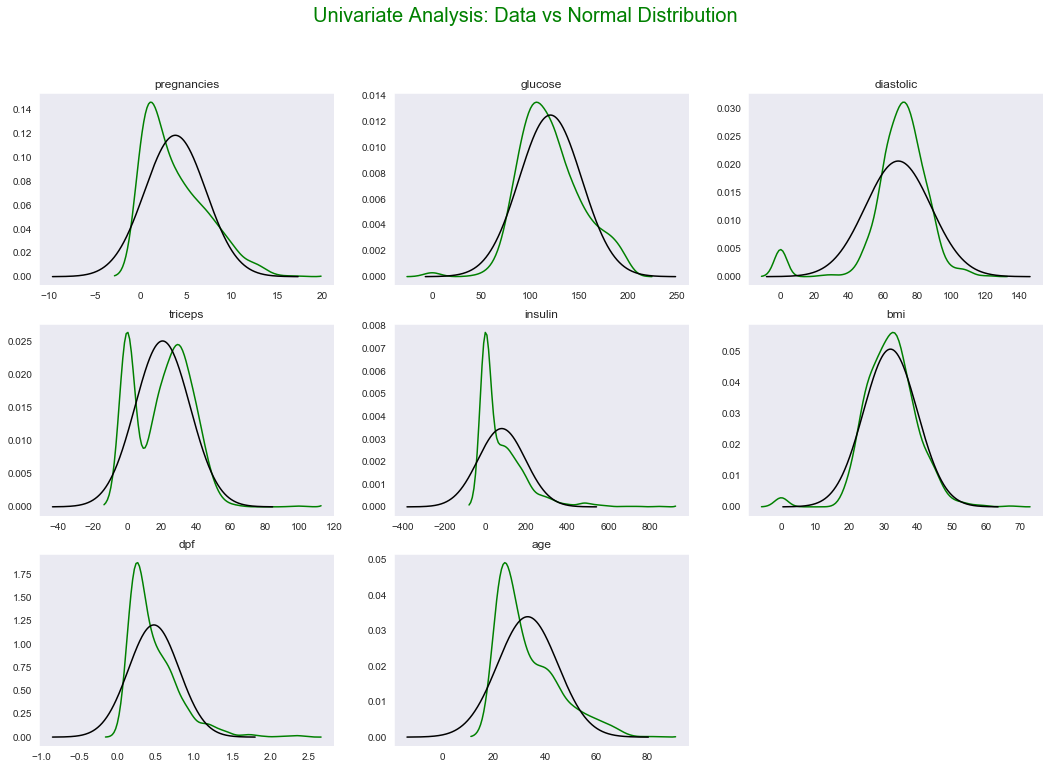

In [374]:
i=0
cols = list(df2.columns)[:-1]
for col in cols:
    plt.subplot(331+i)
    sns.distplot(df2[col],hist=False, norm_hist=True, color=color)
    
    #plot normal distribution to compare
    mean = df[col].mean()
    std = df[col].std()
    x = np.arange(mean-std*4, mean+std*4,.01)
    y = norm.pdf(x, mean, std)
    sns.lineplot(x, y, c='k')
    
    plt.title(col)
    plt.xlabel('')
    i +=1
    
title = plt.suptitle('Univariate Analysis: Data vs Normal Distribution')
plt.setp(title, color=color, size=20)
plt.show()

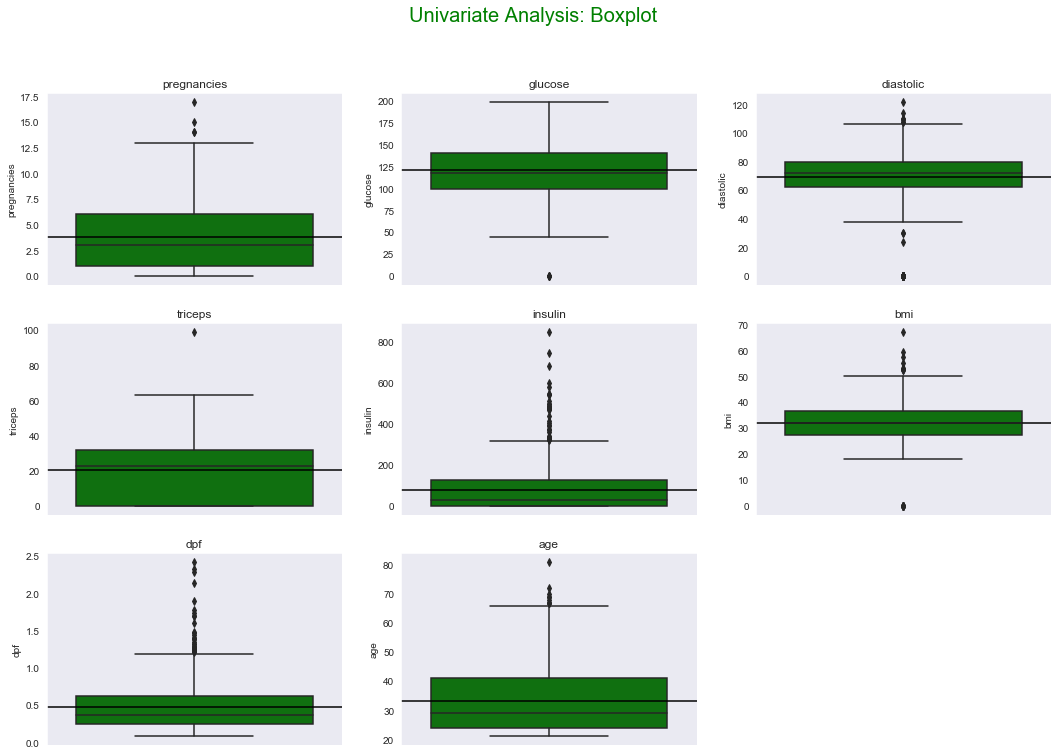

In [375]:
i=0
for col in cols:
    plt.subplot(331+i)
    sns.boxplot(y=col, data=df2, color=color)
    plt.axhline(df2[col].mean(), c='k')
    plt.title(col)
    i +=1
    
title = plt.suptitle('Univariate Analysis: Boxplot')
plt.setp(title, color=color, size=20)
plt.show()

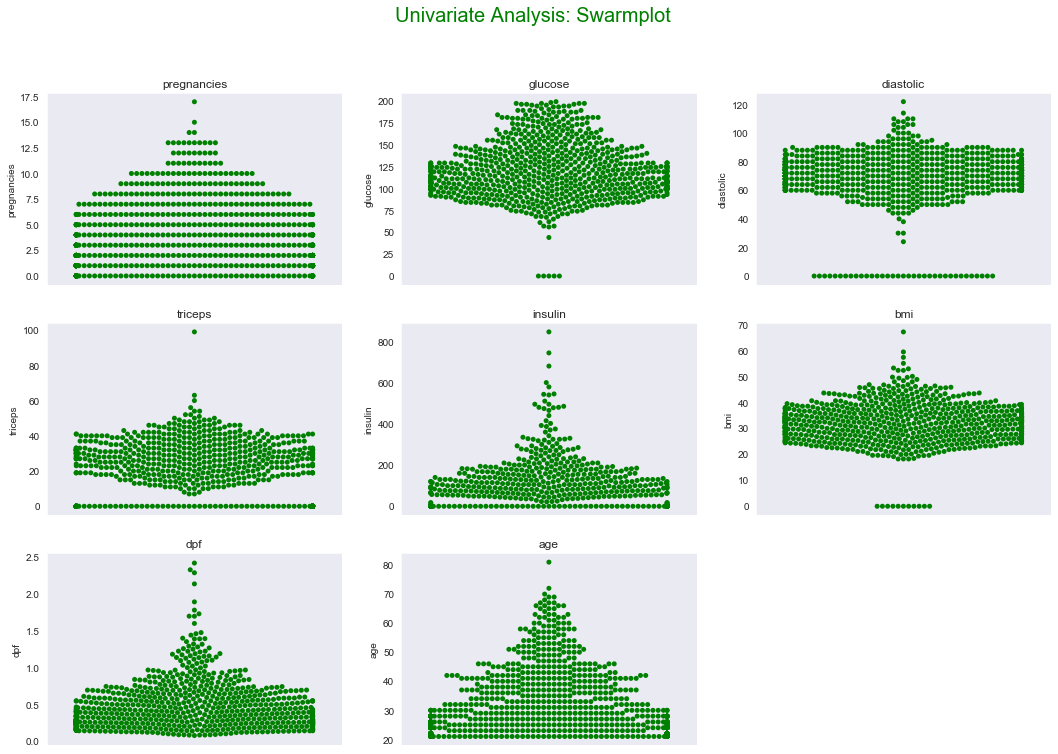

In [376]:
i=0
for col in cols:
    plt.subplot(331+i)
    sns.swarmplot(y=col, data=df2, color=color)
    plt.title(col)
    i +=1

title = plt.suptitle('Univariate Analysis: Swarmplot')
plt.setp(title, color=color, size=20)
plt.show()

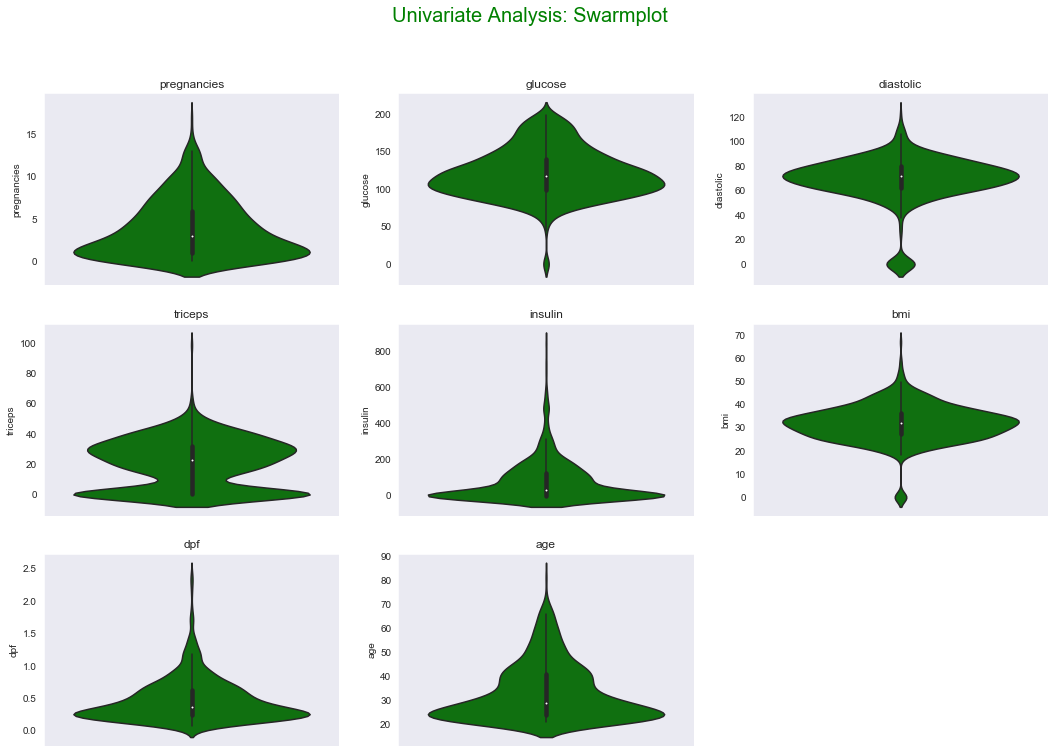

In [377]:
i=0
for col in cols:
    plt.subplot(331+i)
    sns.violinplot(y=col, data=df2, color='g')
    plt.title(col)
    i +=1

title = plt.suptitle('Univariate Analysis: Swarmplot')
plt.setp(title, color=color, size=20)
plt.show()

#### <font color='#F1DB1F'><center> Multivariate Analysis </font>

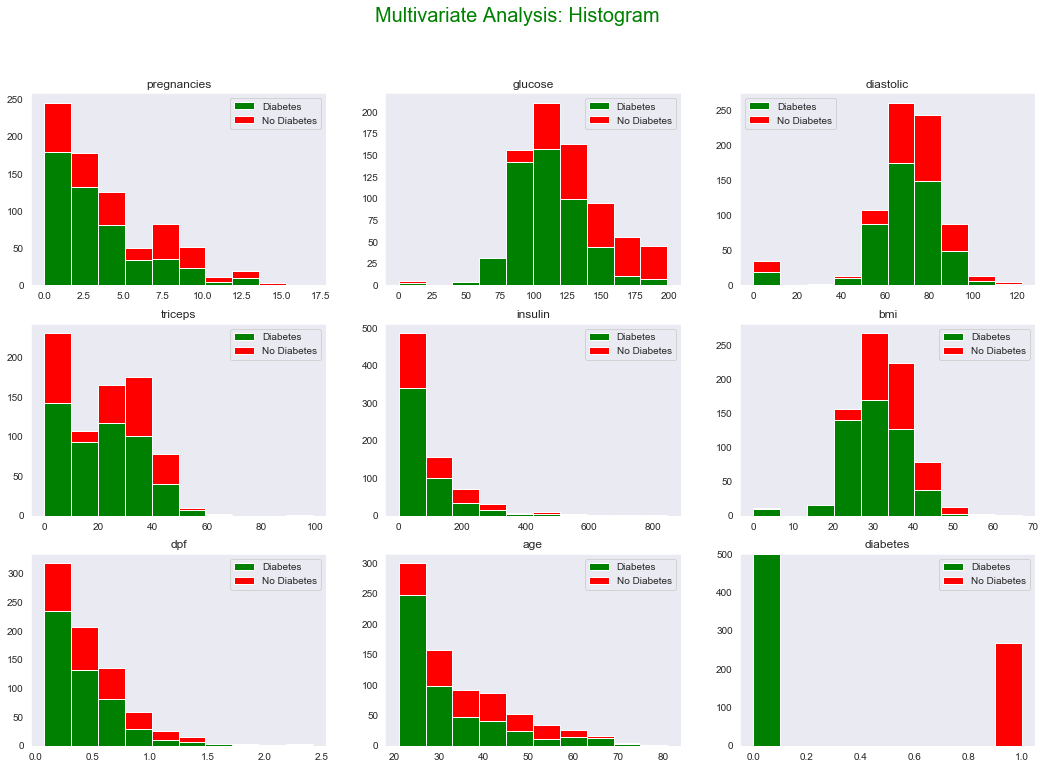

In [378]:
#Histogram
i = 0
for col in df2:
    plt.subplot(331 +i)
    if ((df2[col].dtype == 'int64') | (df2[col].dtype == 'float64') ):
        plt.hist(x = [df2[df2['diabetes']==0][col],df2[df2['diabetes']==1][col]],
                 stacked=True, color=['g', 'r'], label=['Diabetes', 'No Diabetes'] )
        plt.title(col)
        plt.legend()
        plt.xlabel('')
        
    i += 1
title = plt.suptitle('Multivariate Analysis: Histogram')
plt.setp(title, color=color, size=20)
plt.show()

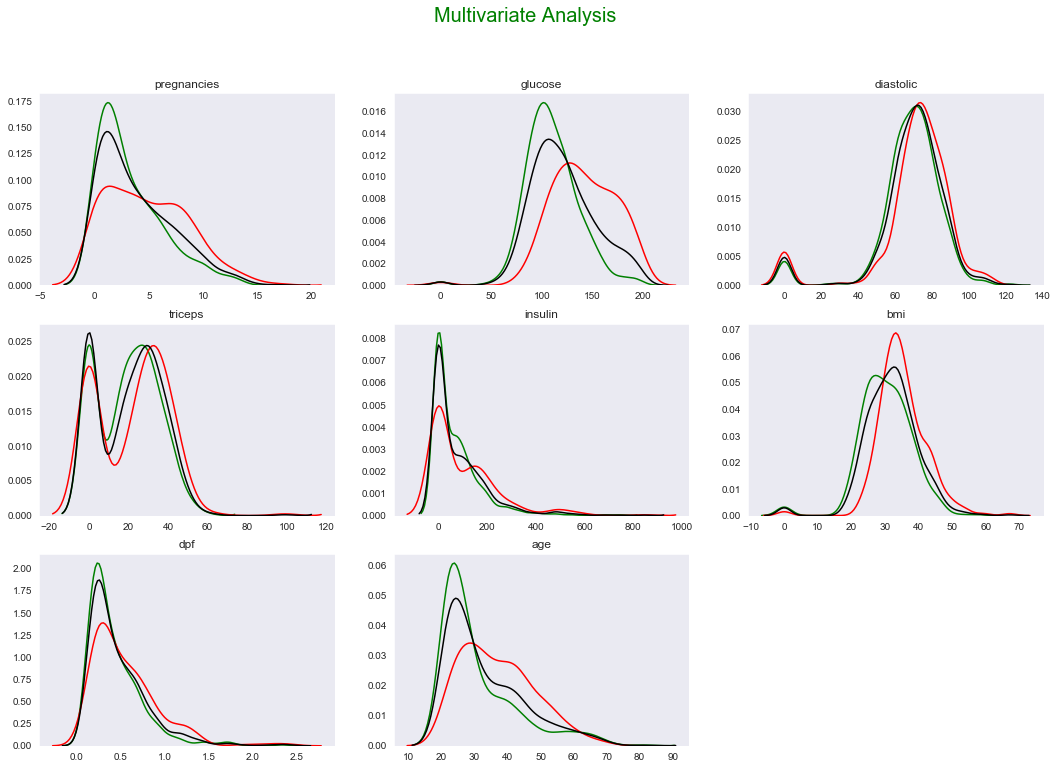

In [379]:
i = 0
for col in cols:
    plt.subplot(331+i)
    sns.distplot(df2[df2['diabetes']==0][col], hist=False, color=color)
    sns.distplot(df2[df2['diabetes']==1][col], hist=False, color='r')
    sns.distplot(df2[col], hist=False, color='k')
    plt.title(col)
    plt.xlabel('')
    i +=1

title = plt.suptitle('Multivariate Analysis')
plt.setp(title, color=color, size=20)
plt.show()

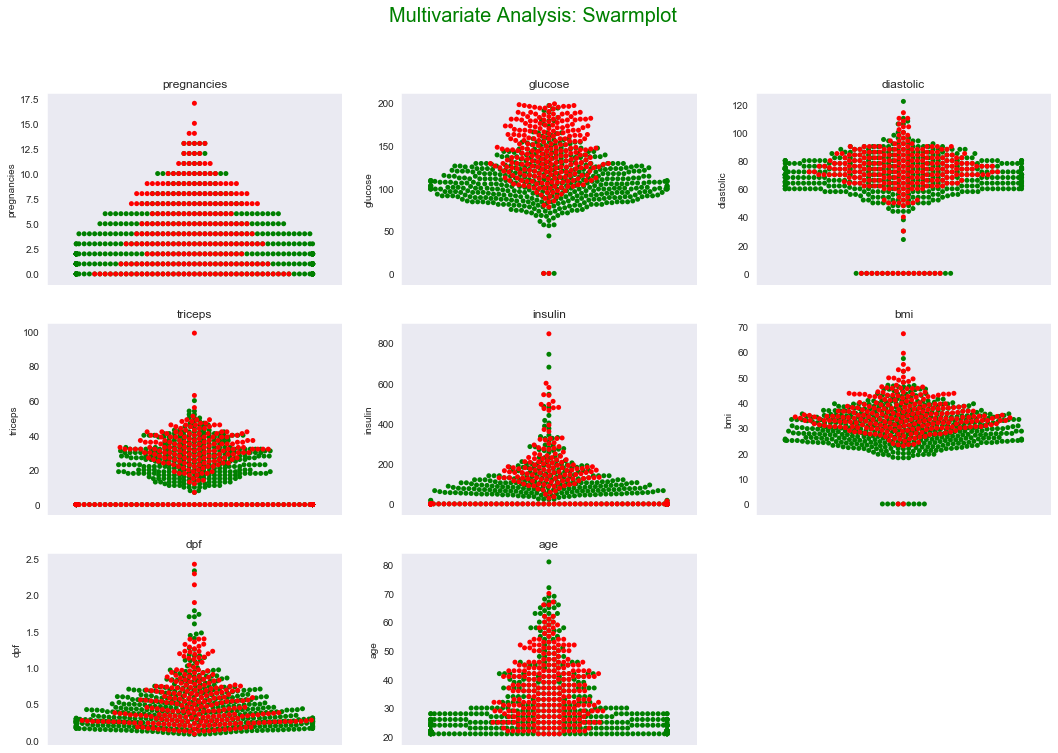

In [380]:
i=0
for col in cols:
    plt.subplot(331+i)
    sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
    sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
    plt.title(col)
    i +=1

title = plt.suptitle('Multivariate Analysis: Swarmplot')
plt.setp(title, color=color, size=20)
plt.show()

## <font color='41D05C'><center> Part 3: Data Preprocessing </font>

#### <font color='#F1DB1F'><center> Process Outliers </font>

In [381]:
df3 = df2.copy()
obs = len(df2)

##### <center> Glucose

In [382]:
col = 'glucose'
perc = df3[df3[col] == 0][col].count()/obs * 100
print('Diastolic Outliers: {:.2f}%'.format(perc))
df3 = df3[df3[col] != 0 ]

Diastolic Outliers: 0.65%


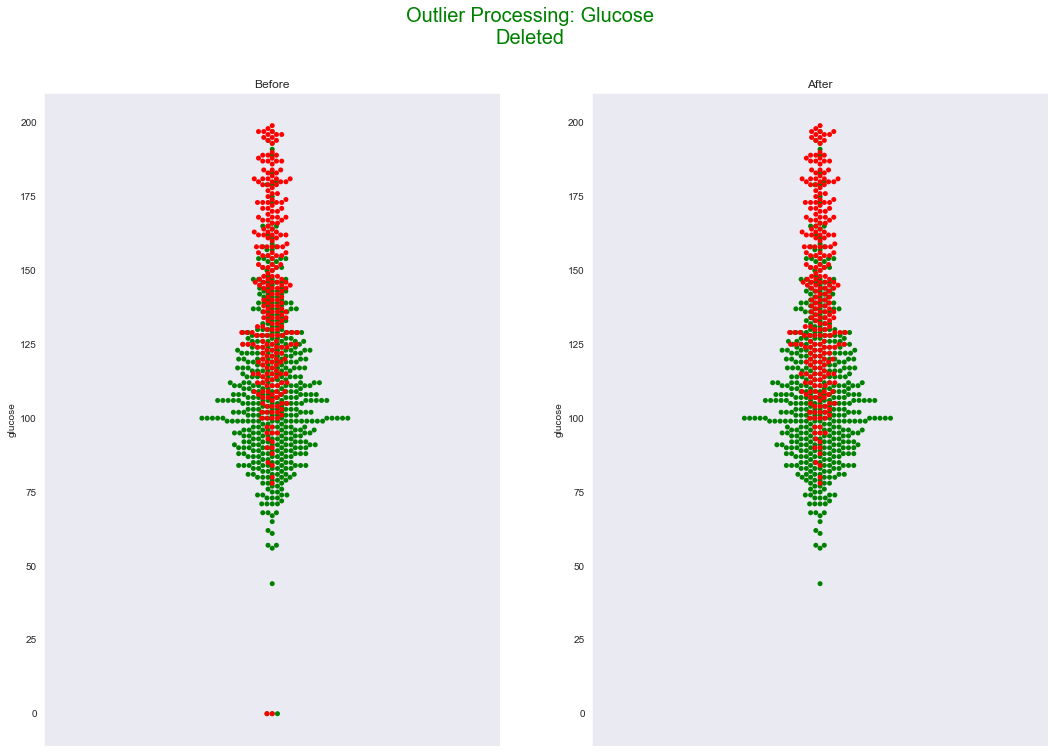

In [383]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
ax1.set_title('Before')

ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
sns.swarmplot(y=df3[df3['diabetes']==0][col],color='g', data=df3)
sns.swarmplot(y=df3[df3['diabetes']==1][col],color='r', data=df3)
ax2.set_title('After')

title = plt.suptitle('Outlier Processing: {}\nDeleted'.format(col.title()))
plt.setp(title, color=color, size=20)
plt.show()

##### <center> Diastolic

In [384]:
col = 'diastolic'
perc = df3[df3[col] == 0][col].count()/obs * 100
print('Diastolic Outliers: {:.2f}%'.format(perc))
df3 = df3[df3[col] !=0]

Diastolic Outliers: 4.56%


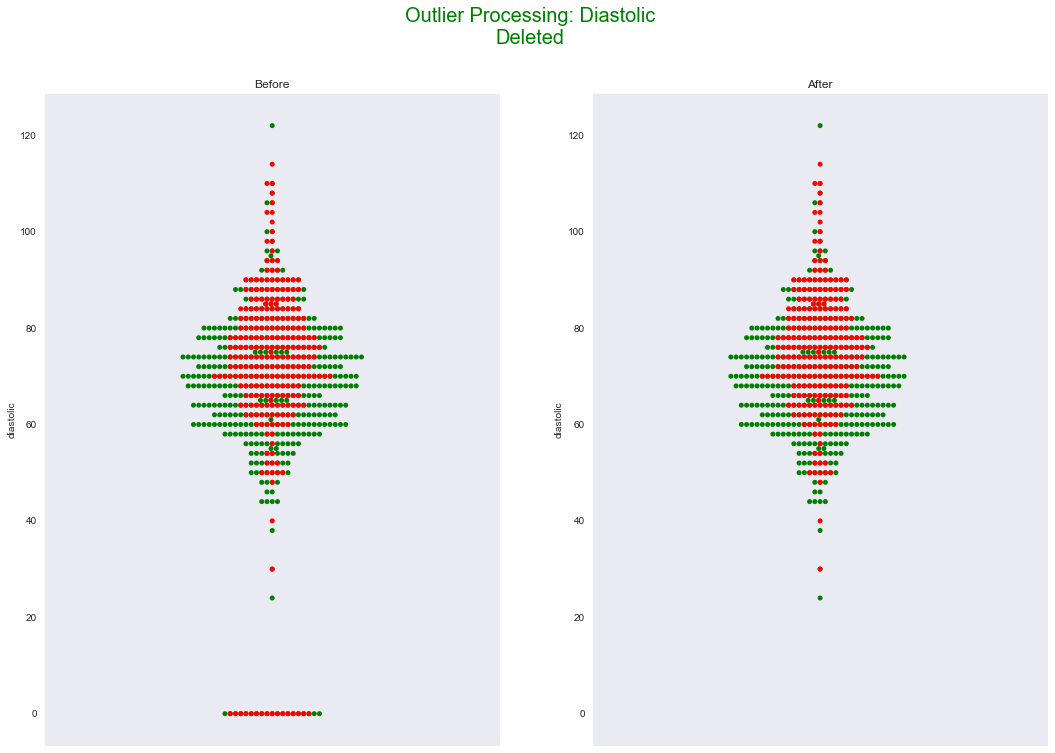

In [385]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
ax1.set_title('Before')

ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
sns.swarmplot(y=df3[df3['diabetes']==0][col],color='g', data=df3)
sns.swarmplot(y=df3[df3['diabetes']==1][col],color='r', data=df3)
ax2.set_title('After')

title = plt.suptitle('Outlier Processing: {}\nDeleted'.format(col.title()))
plt.setp(title, color=color, size=20)
plt.show()

##### <center> Triceps

In [386]:
col = 'triceps'
perc = df3[df3[col] == 0][col].count()/obs * 100
print('Outliers: {:.2f}%'.format(perc))

outliers = df3[df3[col] == 0]
df3 = df3[df3[col] != 0]

# Redistribute outliers
mean = df3[df3['diabetes']==1][col].mean()
std = df3[df3['diabetes']==1][col].std()
size = len(outliers)
X = np.random.normal(mean, std, size=size)
outliers[col] = [ round(x, 2) for x in X]
df3 = pd.concat([df3, outliers])

# delete one outlier above 80
df3 = df3[df3[col] < 80]

Outliers: 25.26%


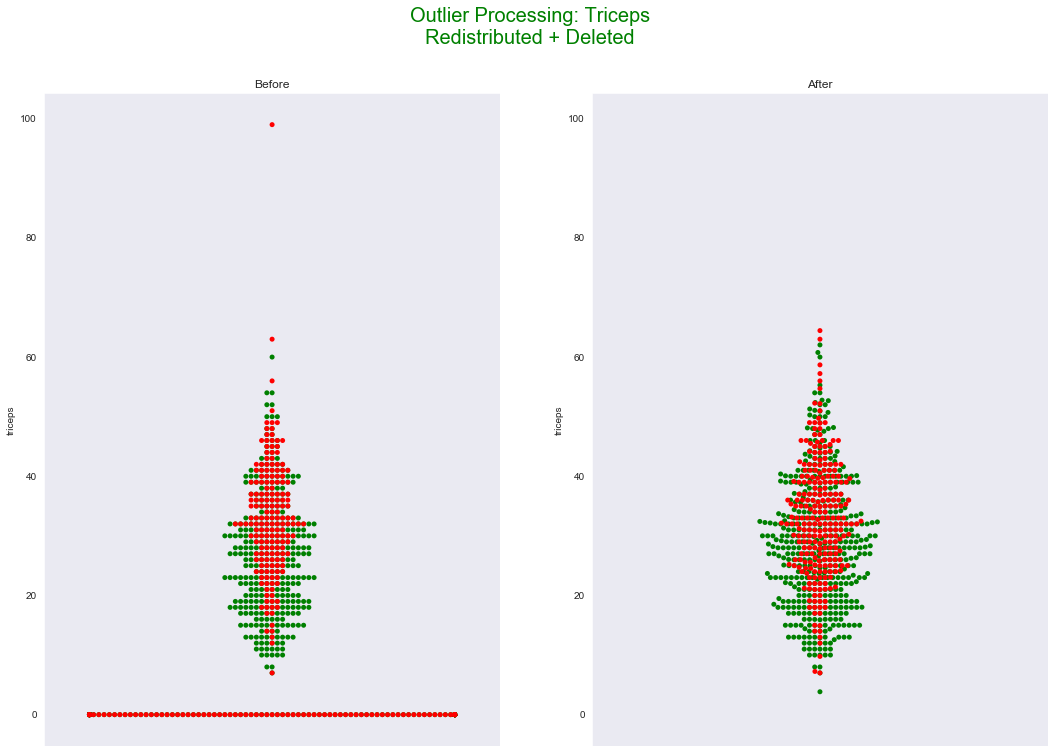

In [387]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
ax1.set_title('Before')

ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
sns.swarmplot(y=df3[df3['diabetes']==0][col],color='g', data=df3)
sns.swarmplot(y=df3[df3['diabetes']==1][col],color='r', data=df3)
ax2.set_title('After')

title = plt.suptitle('Outlier Processing: {}\nRedistributed + Deleted'.format(col.title()))
plt.setp(title, color=color, size=20)
plt.show()

##### <center> Insulin

In [388]:
col = 'insulin'
perc = df3[df3[col] == 0][col].count()/obs * 100
print('{} Outliers: {:.2f}%'.format(col.title(),perc))

Insulin Outliers: 43.49%


In [389]:
outliers = df3[df3[col] == 0]
df3 = df3[df3[col] != 0]

# Redistribute outliers
mean = df3[df3['diabetes']==1][col].mean()
std = df3[df3['diabetes']==1][col].std()
size = len(outliers)
X = np.random.normal(mean, std, size=size)
outliers[col] = [abs(round(x, 2)) for x in X]
df3 = pd.concat([df3, outliers])

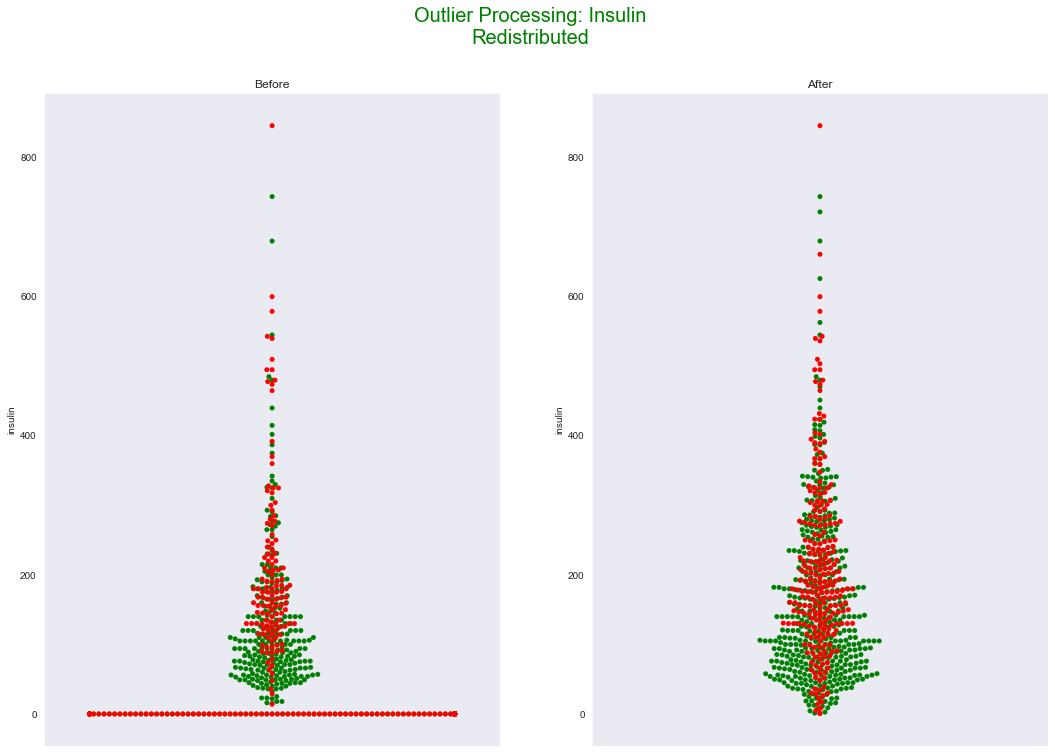

In [390]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
ax1.set_title('Before')

ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
sns.swarmplot(y=df3[df3['diabetes']==0][col],color='g', data=df3)
sns.swarmplot(y=df3[df3['diabetes']==1][col],color='r', data=df3)
ax2.set_title('After')

title = plt.suptitle('Outlier Processing: {}\nRedistributed'.format(col.title()))
plt.setp(title, color=color, size=20)
plt.show()

##### <center> BMI

In [391]:
col = 'bmi'
perc = df3[df3[col] == 0][col].count()/obs * 100
print('{} Outliers: {:.2f}%'.format(col.title(),perc))

Bmi Outliers: 0.52%


In [392]:
outliers = df3[df3[col] == 0]
df3 = df3[df3[col] != 0]

# Redistribute outliers
mean = df3[df3['diabetes']==1][col].mean()
std = df3[df3['diabetes']==1][col].std()
size = len(outliers)
X = np.random.normal(mean, std, size=size)
outliers[col] = [abs(round(x, 2)) for x in X]
df3 = pd.concat([df3, outliers])

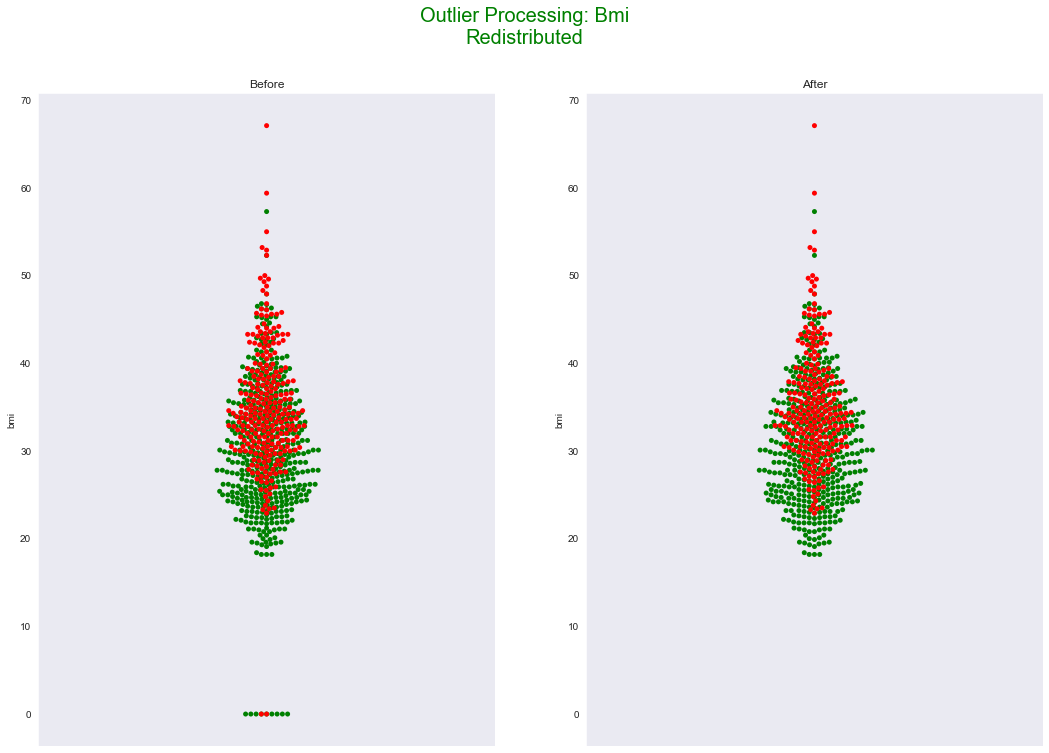

In [393]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
ax1.set_title('Before')

ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
sns.swarmplot(y=df3[df3['diabetes']==0][col],color='g', data=df3)
sns.swarmplot(y=df3[df3['diabetes']==1][col],color='r', data=df3)
ax2.set_title('After')

title = plt.suptitle('Outlier Processing: {}\nRedistributed'.format(col.title()))
plt.setp(title, color=color, size=20)
plt.show()

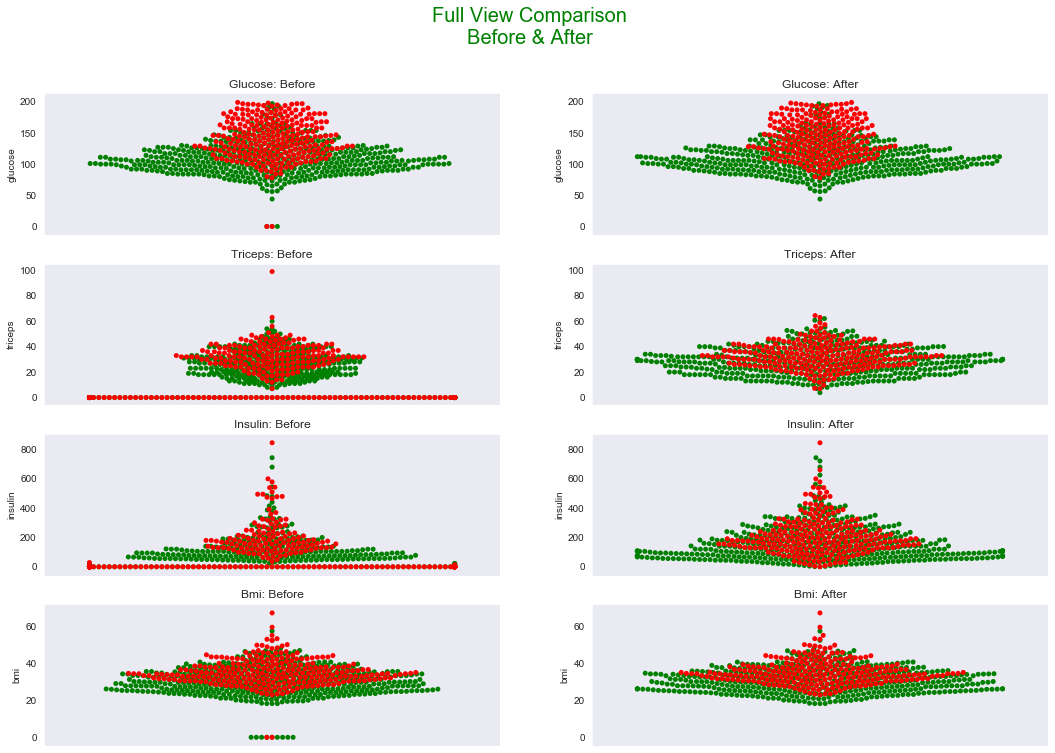

In [394]:
cols = ['glucose', 'triceps', 'insulin', 'bmi']
i=0
for col in cols:
        ax1 = plt.subplot(421+i)
        sns.swarmplot(y=df2[df2['diabetes']==0][col],color='g', data=df2)
        sns.swarmplot(y=df2[df2['diabetes']==1][col],color='r', data=df2)
        plt.title('{}: Before'.format(col.title()))
        i +=1
        
        ax2 = plt.subplot(421+i, sharey=ax1)
        sns.swarmplot(y=df3[df3['diabetes']==0][col],color='g', data=df3)
        sns.swarmplot(y=df3[df3['diabetes']==1][col],color='r', data=df3)
        plt.title('{}: After'.format(col.title()))
        i +=1
    
title = plt.suptitle('Full View Comparison\nBefore & After')
plt.setp(title, color=color, size=20)
plt.show()

## <font color='41D05C'><center> Part 4: Predict </font>

In [517]:
ML_army = [
    
    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
   
    #Ensemble Army
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreeClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    RidgeClassifierCV(),
    SGDClassifier(),
    
    
    #Naive Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    LinearSVC(),
    NuSVC(probability=True),
    SVC(probability=True),
    
    #Trees
    DecisionTreeClassifier(),
    ExtraTreeClassifier()
    
    
]

In [518]:
Predictors = list(df3.columns)[:-1]
Target     = list(df3.columns)[-1:]

X = df3[Predictors][627:].values
y = df3[Target][627:].values

In [519]:
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Validation Accuracy', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD',
              'MLA Train Accuracy Mean']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [520]:
i
for mla in ML_army:
    
    name = mla.__class__.__name__
   
    
    steps = [('scaler', StandardScaler()), 
             (name, mla)]
    

    pipeline = Pipeline(steps)
    cv_results = cross_validate(pipeline, df3[Predictors][:627], df3[Target][:627], cv=10)
    
    pipeline.fit(df3[Predictors][:627].values, df3[Target][:627].values)
    val_score = pipeline.score(X, y)
    
    MLA_compare.loc[i, 'MLA Name'] = name
    MLA_compare.loc[i, 'MLA Parameters'] = str(mla.get_params())
    MLA_compare.loc[i, 'MLA Validation Accuracy'] = val_score
    MLA_compare.loc[i, 'MLA Test Accuracy Mean'] = round(cv_results['test_score'].mean(),3)
    MLA_compare.loc[i, 'MLA Test Accuracy 3*STD'] = round(cv_results['test_score'].std()*3,3)
    MLA_compare.loc[i, 'MLA Train Accuracy Mean'] = round(cv_results['train_score'].mean(),3)
   
    i += 1

MLA_compare.sort_values(by='MLA Validation Accuracy',ascending=False, inplace=True)

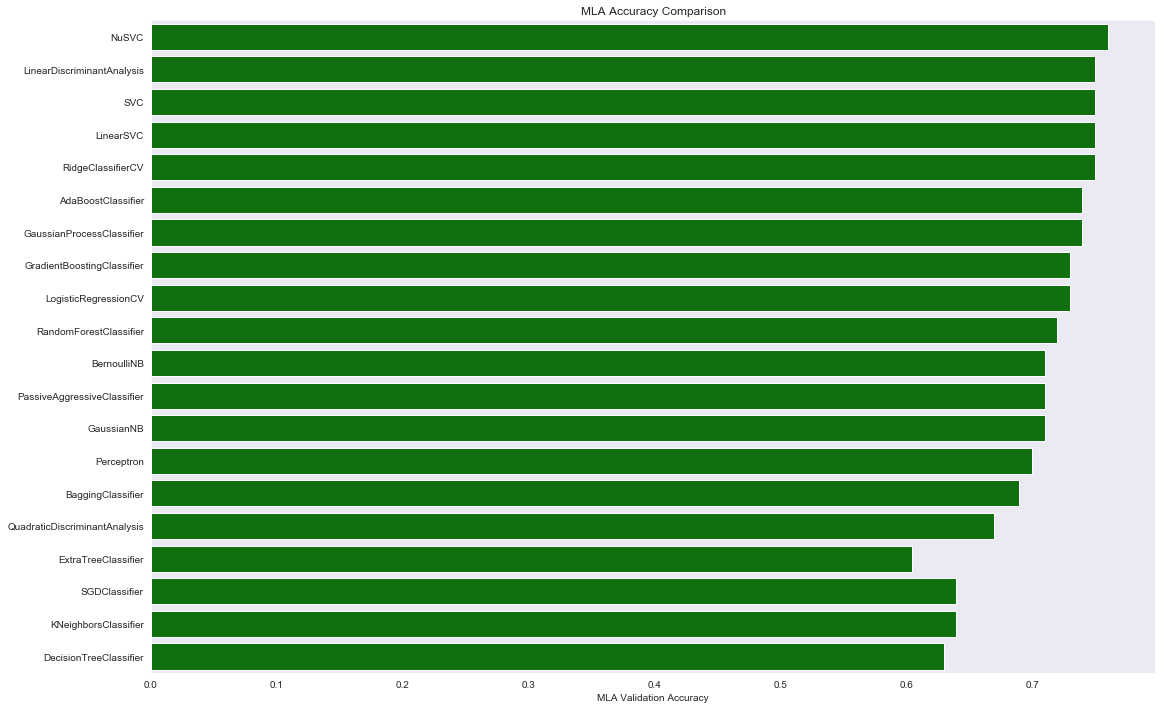

In [521]:
sns.barplot(x='MLA Validation Accuracy', y='MLA Name',ci=None, data=MLA_compare, color='g')
plt.title('MLA Accuracy Comparison')
plt.ylabel('')
plt.show()

In [524]:
x = MLA_compare[MLA_compare['MLA Name'] == 'NuSVC']['MLA Parameters']

In [525]:
str(x)

"149    {'cache_size': 200, 'class_weight': None, 'coe...\nName: MLA Parameters, dtype: object"